# Student Information

### **Name:** Musfique Ahmed  
### **ID:** 0152330101

---
### EDA Process:

In my exploratory data analysis (EDA) of the dataset, I explored the relationships among features and their impact on income. Key findings include:

1. **Handling Missing Values**: I identified and addressed null values using techniques such as forward and backward fill, ensuring the dataset remained robust. For specific columns, I imputed missing values with the mean or mode.

2. **Outlier Analysis**: I assessed outliers in key numerical columns like `fnlwgt` and `hours-per-week`, determining their influence on data distribution and deciding whether to retain or drop them.

3. **Correlation Analysis**: The heatmap revealed significant relationships, particularly the positive correlation between education and income, and a negative correlation indicating income disparities based on gender.

4. **Feature Visualization**: Visualizations like histograms and scatter plots helped uncover distributions and relationships among numerical features, enhancing my understanding of the data.
---

In [384]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.pandas.set_option('display.max_columns', None)

In [385]:
df = pd.read_csv("adult_with_nan_except_income.csv")
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25.0,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,NaN,NaN,0.0,0.0,40.0,United-States,<=50K
1,38.0,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28.0,Local-gov,336951.0,Assoc-acdm,NaN,Married-civ-spouse,Protective-serv,Husband,White,NaN,0.0,0.0,40.0,United-States,>50K
3,44.0,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
4,NaN,?,103497.0,NaN,10.0,Never-married,?,Own-child,White,NaN,0.0,0.0,30.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27.0,Private,NaN,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,38.0,United-States,<=50K
48838,40.0,Private,154374.0,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,NaN,Male,0.0,0.0,40.0,United-States,>50K
48839,58.0,Private,151910.0,HS-grad,NaN,NaN,Adm-clerical,Unmarried,White,Female,0.0,0.0,NaN,United-States,<=50K
48840,22.0,Private,201490.0,NaN,9.0,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,20.0,United-States,<=50K


In [386]:
df.size

732630

In [387]:
df.shape

(48842, 15)

In [388]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              46707 non-null  float64
 1   workclass        47539 non-null  object 
 2   fnlwgt           44822 non-null  float64
 3   education        46444 non-null  object 
 4   educational-num  44170 non-null  float64
 5   marital-status   47029 non-null  object 
 6   occupation       45083 non-null  object 
 7   relationship     47690 non-null  object 
 8   race             46112 non-null  object 
 9   gender           45606 non-null  object 
 10  capital-gain     44829 non-null  float64
 11  capital-loss     45092 non-null  float64
 12  hours-per-week   44580 non-null  float64
 13  native-country   48001 non-null  object 
 14  income           48842 non-null  object 
dtypes: float64(6), object(9)
memory usage: 5.6+ MB


In [389]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,46707.000000,4.482200e+04,44170.000000,44829.000000,45092.000000,44580.000000
mean,38.637485,1.897457e+05,10.080371,1067.445716,87.981859,40.404845
std,13.721635,1.052755e+05,2.566178,7393.608256,403.990449,12.383400
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176758e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783485e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.378608e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


# **Working with Numerical Values**

### **Identifying features with numerical values**

After identifying features with numarical values we will identify which one has Discrete values and which one has Continuous values

In [390]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  6


,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
0,25.0,226802.0,7.0,0.0,0.0,40.0
1,38.0,89814.0,9.0,0.0,0.0,50.0
2,28.0,336951.0,NaN,0.0,0.0,40.0
3,44.0,160323.0,10.0,7688.0,0.0,40.0
4,NaN,103497.0,10.0,0.0,0.0,30.0


In [391]:
df.nunique()

age                   74
workclass              9
fnlwgt             26985
education             16
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
capital-gain         122
capital-loss          99
hours-per-week        96
native-country        42
income                 2
dtype: int64

**Identifying discrete values**

After identifying discrete values we will visualize it to get a better understanding from it.

In [392]:
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<20]
print(f"Discrete Variables Count: {len(discrete_feature)}")
discrete_feature

Discrete Variables Count: 1


['educational-num']

In [393]:
discrete_feature

['educational-num']

In [394]:
data = df.copy()

# Group by 'educational-num' and 'income', and count the number of entries 
# Convert the multi-index series into a DataFrame, where income categories ('>50K' and '<=50K') become separate columns.
grouped_data = data.groupby(['educational-num', 'income']).size().unstack()

grouped_data

income,<=50K,>50K
educational-num,,
1.0,68,1
2.0,215,6
3.0,431,25
4.0,811,57
5.0,646,32
6.0,1161,75
7.0,1568,86
8.0,556,43
9.0,12009,2276


In the above code we got only one column with discrete values, then grouped it based on it's own category and `income` category.

From the visualyzation we can see that people with 9.0 Educational number or level has more number of people with below 50k income and
people with 13.00 Educational number or level has more number of people with above 50k

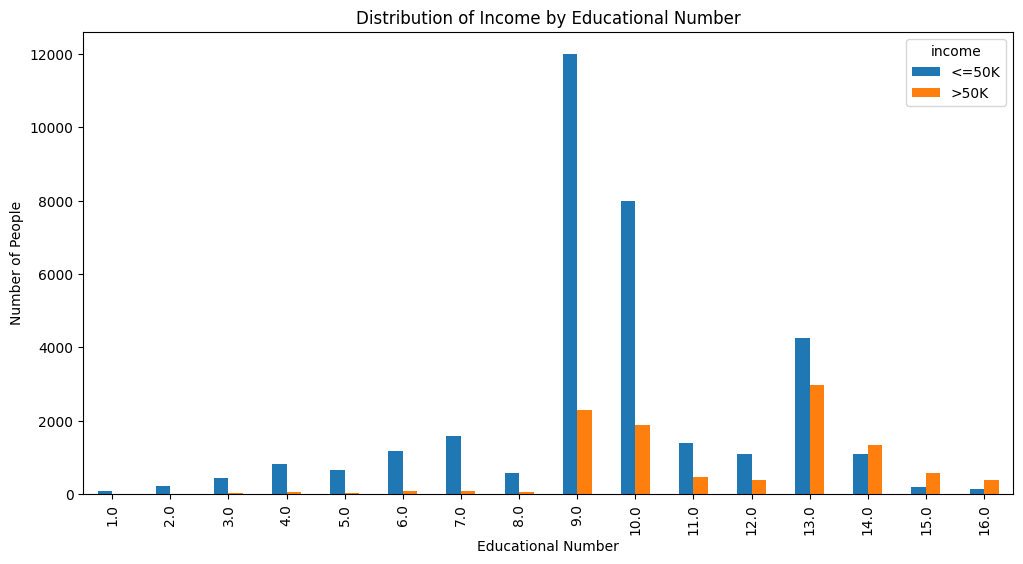

In [395]:
# Plotting the grouped bar chart
grouped_data.plot.bar(figsize=(12, 6))

# Adding labels and title
plt.xlabel("Educational Number")
plt.ylabel("Number of People")
plt.title("Distribution of Income by Educational Number")
plt.show()

**Identifying the Continuous values**

After identifying the continuous values we will visulaize it to get a better insights

In [396]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print(f"Continuous feature Count: {len(continuous_feature)}")

Continuous feature Count: 5


In [397]:
continuous_feature

['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']

**Analysing the continuous values by creating histograms to understand the distribution**

After analyzing the visualizations below, we can say that-

1. The dataset has data of almost all ages from 10 to 90, where most of the data came from age 20 to 50
2. Most of the final waight (`fnlwgt`) comes from the range of 0.1 to 0.3
3. Most people dont have capital gain and capital loss
4. Most popular pick of hours per week is situated at the range of 35-40 

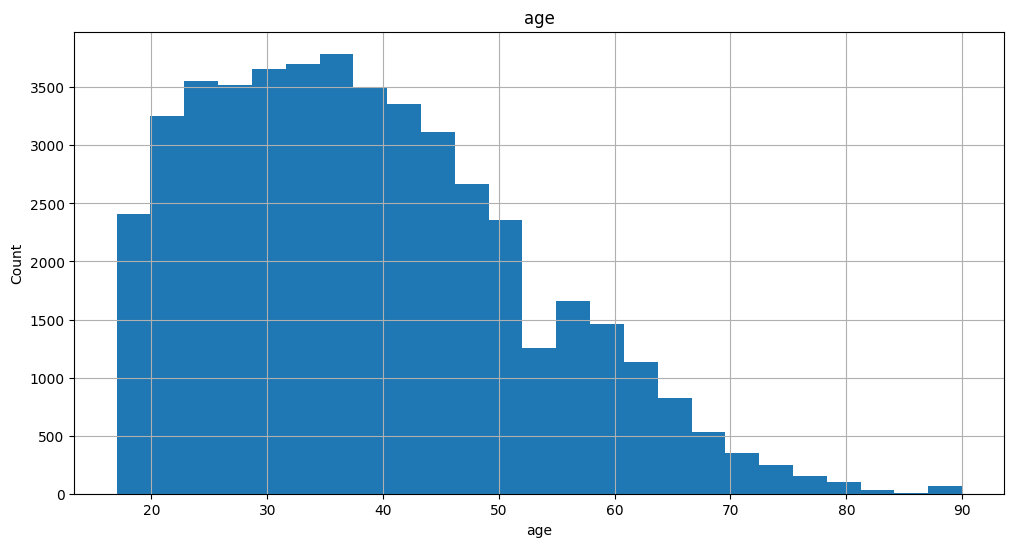

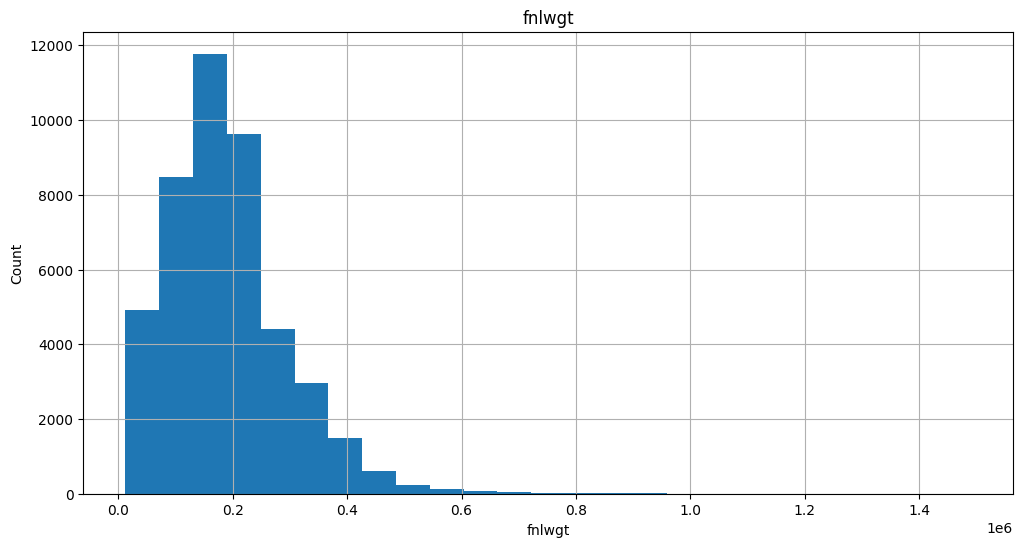

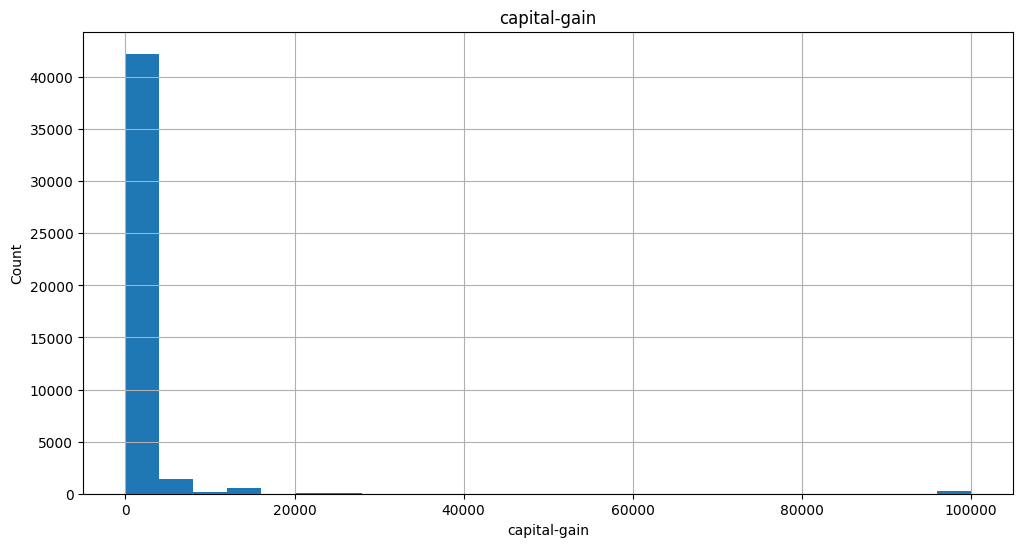

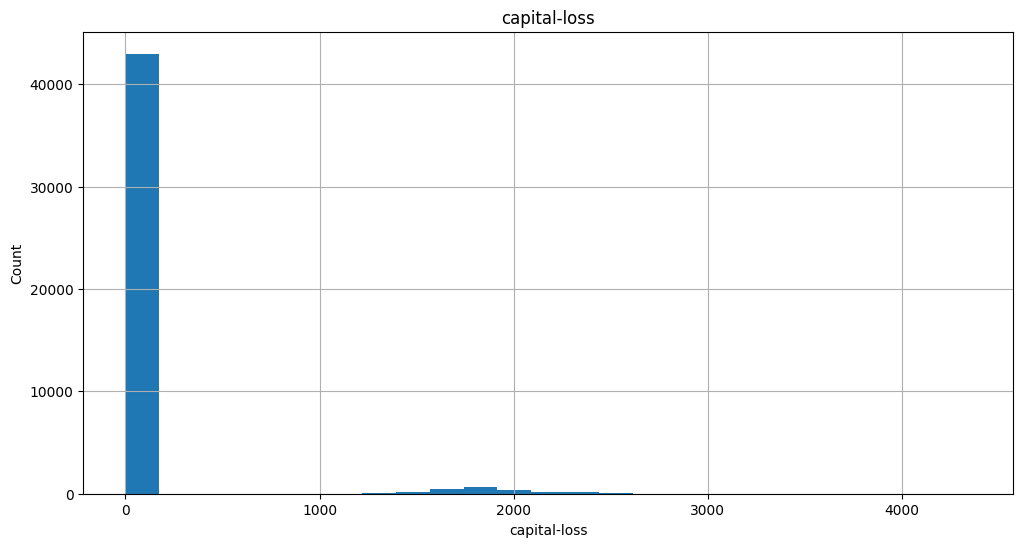

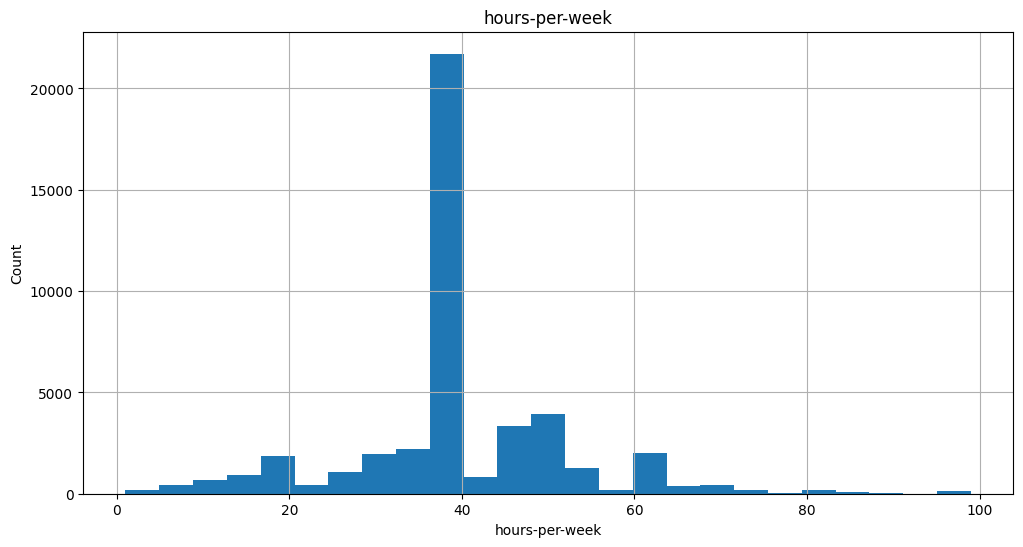

In [398]:

for feature in continuous_feature:
    data=df.copy()
    data[feature].hist(bins=25,figsize=(12, 6))
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

# **Outliers**

**Outlier of the whole dataset**


<Axes: >

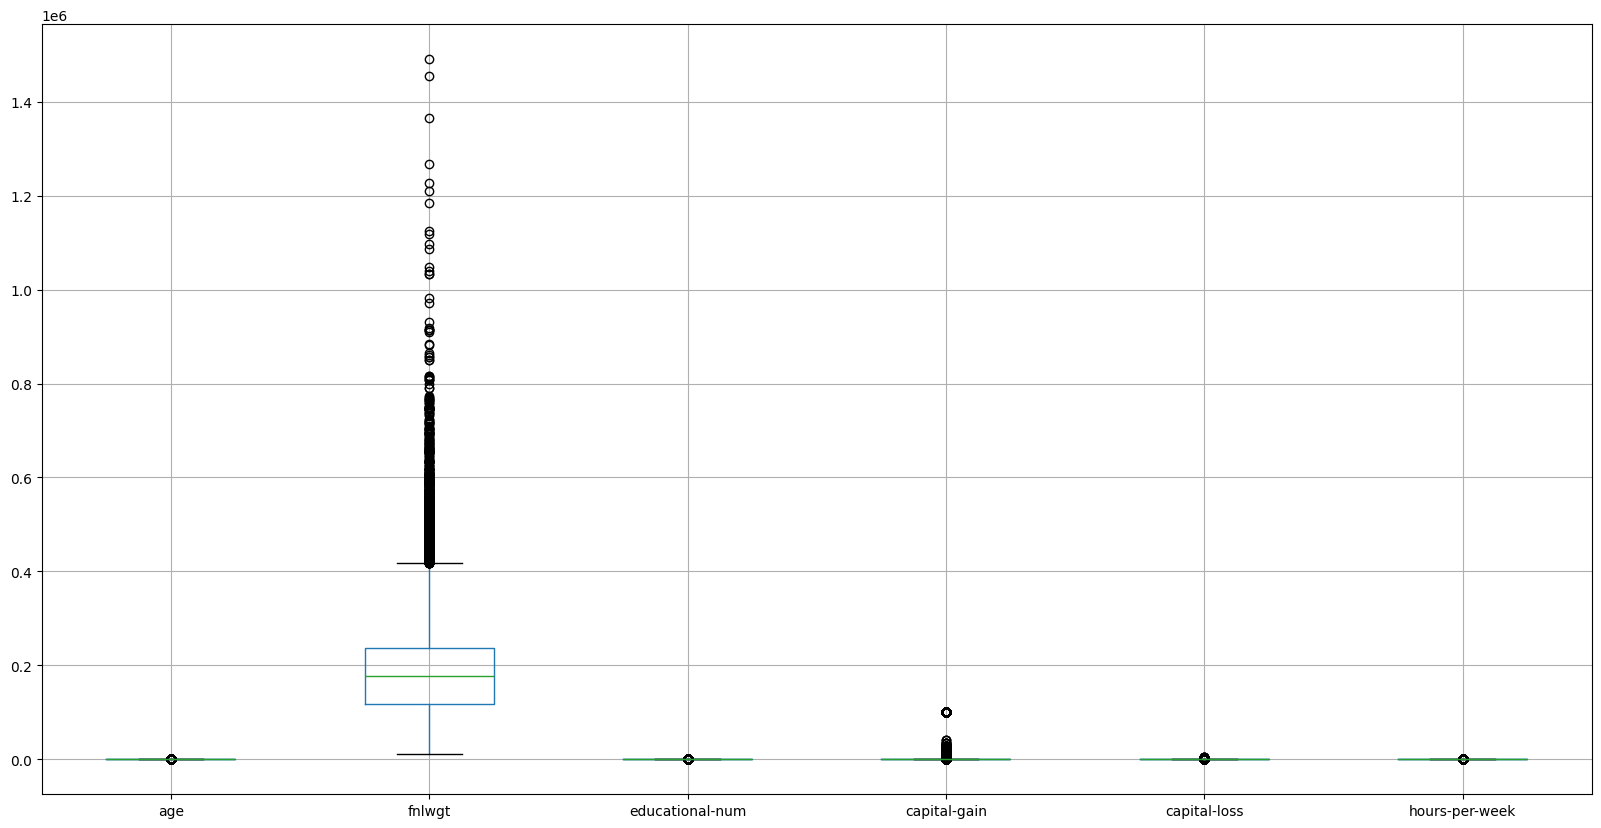

In [399]:
df.boxplot(figsize=(20,10))

**Outliars if individual numerical columns**

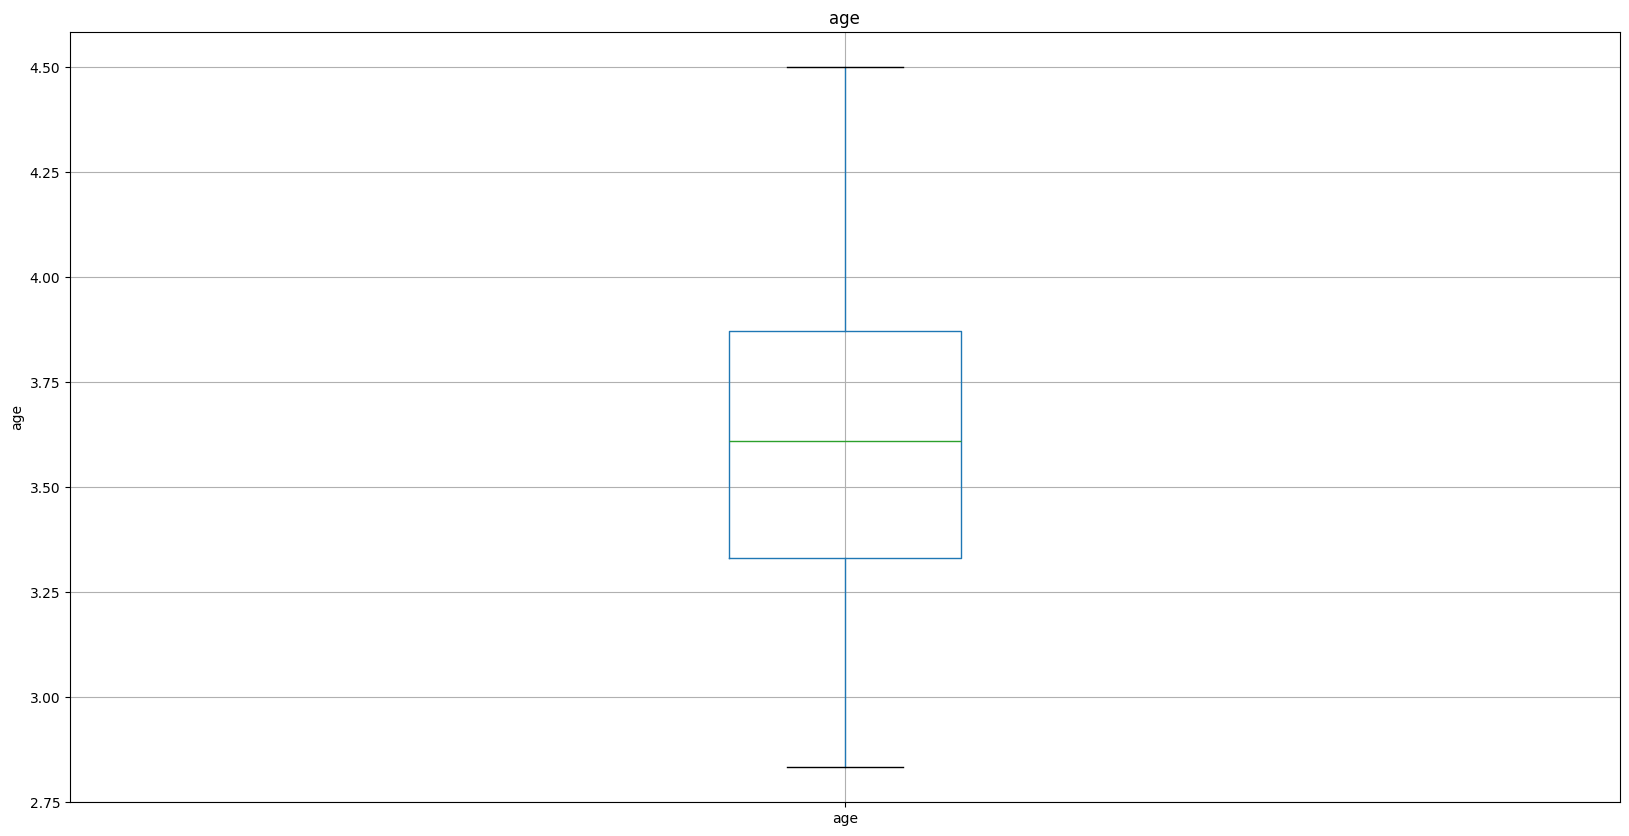

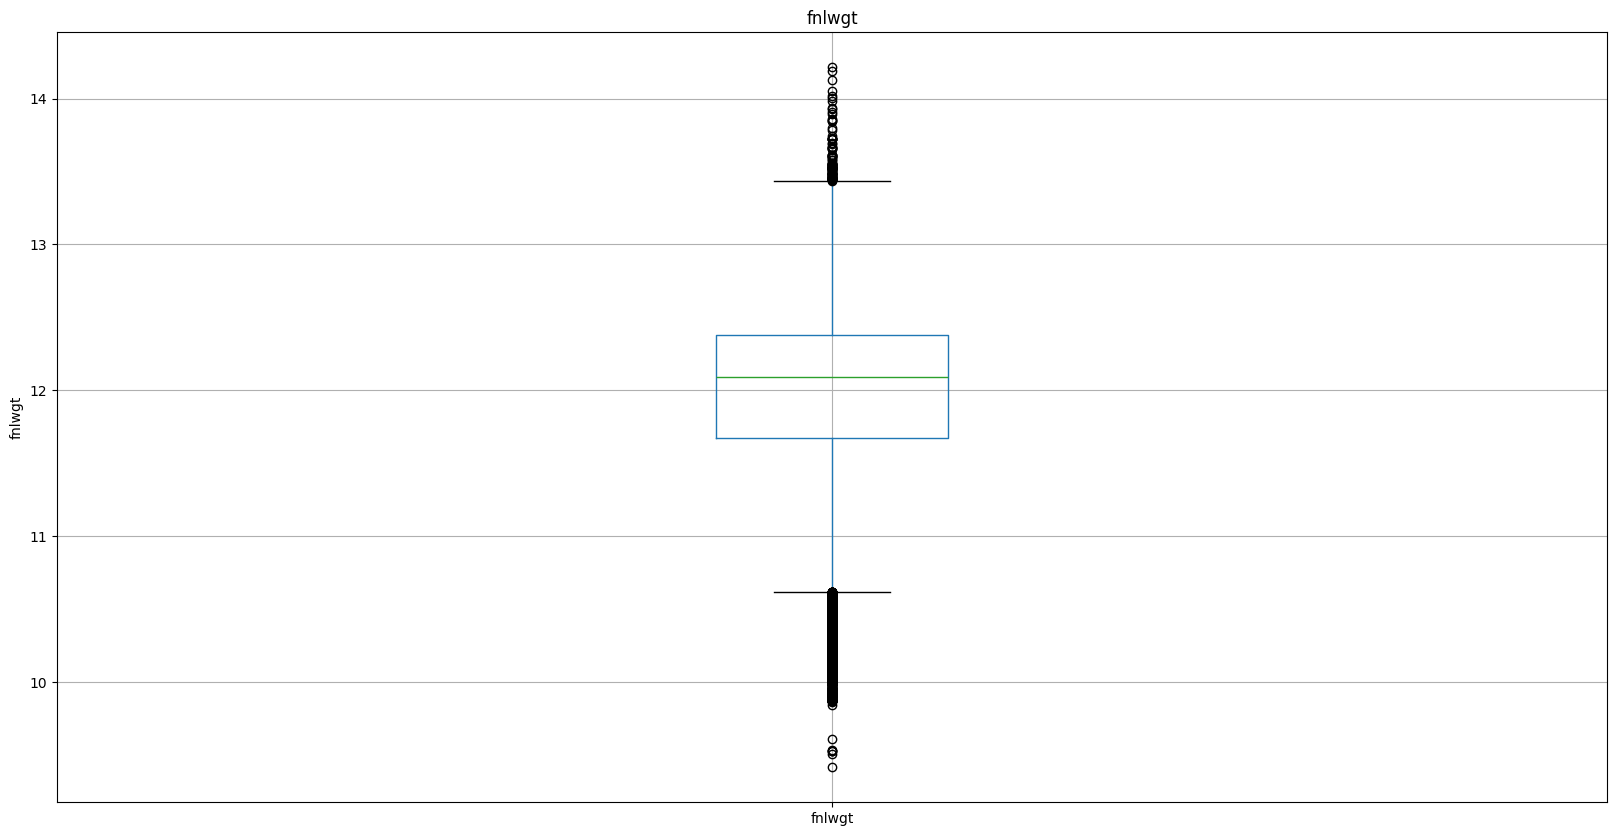

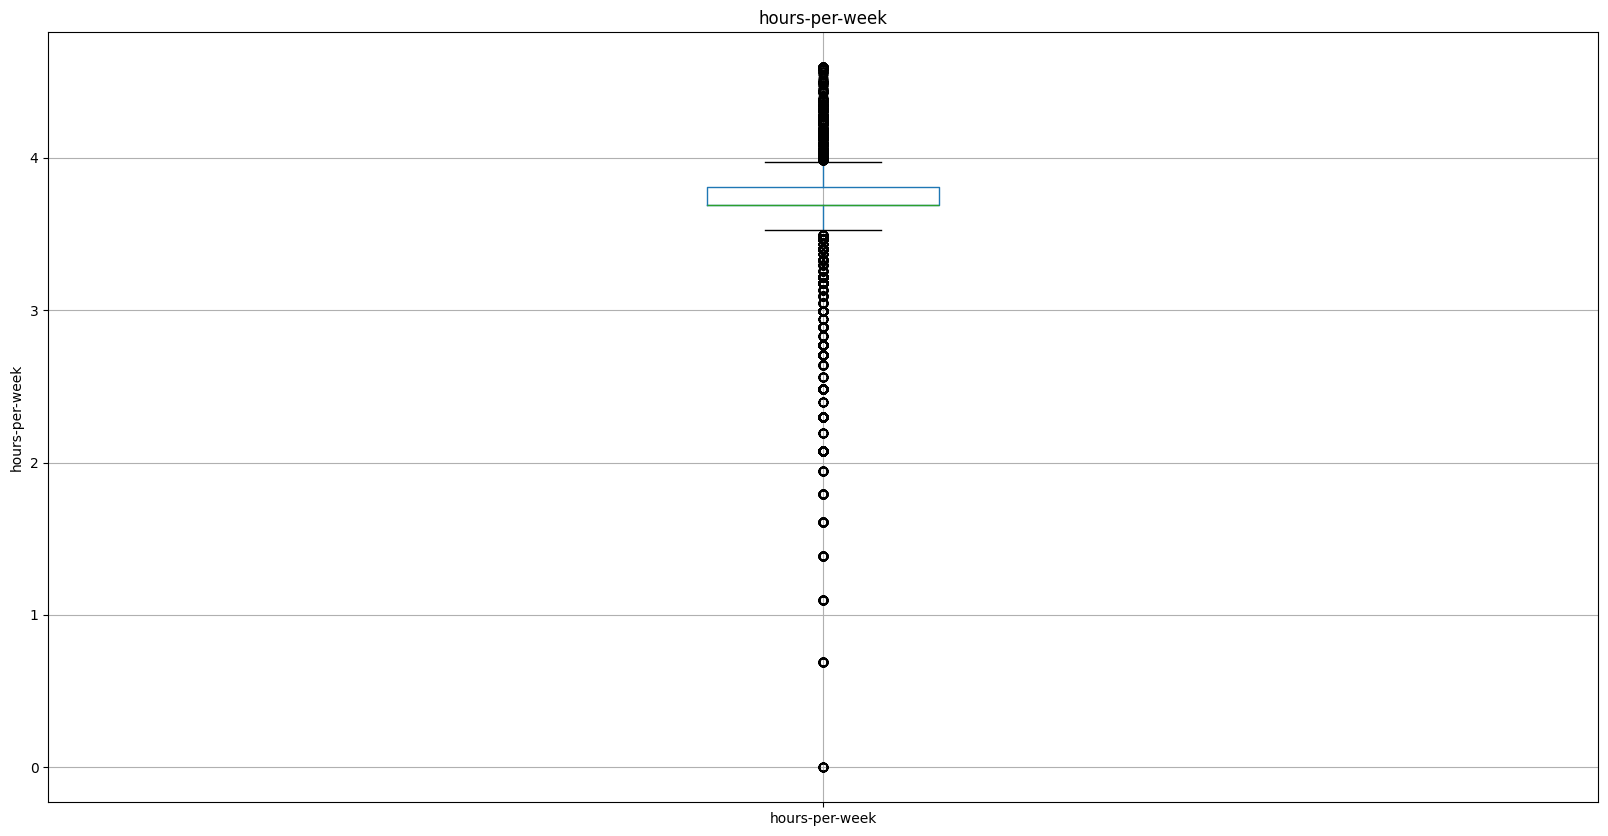

In [400]:
for feature in continuous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

# **Working with Null Values and Missing Values**

In [401]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              46707 non-null  float64
 1   workclass        47539 non-null  object 
 2   fnlwgt           44822 non-null  float64
 3   education        46444 non-null  object 
 4   educational-num  44170 non-null  float64
 5   marital-status   47029 non-null  object 
 6   occupation       45083 non-null  object 
 7   relationship     47690 non-null  object 
 8   race             46112 non-null  object 
 9   gender           45606 non-null  object 
 10  capital-gain     44829 non-null  float64
 11  capital-loss     45092 non-null  float64
 12  hours-per-week   44580 non-null  float64
 13  native-country   48001 non-null  object 
 14  income           48842 non-null  object 
dtypes: float64(6), object(9)
memory usage: 5.6+ MB


## **Identifying features with missing values**

**Transforming unknown values into NaN values**

In [402]:
# In some columns there are a value "?". As it means a missing value, I am replacing it with NaN
df.replace('?', np.nan, inplace = True)

**Calculating the number and the parcentage of NaN values in each columns**

In [403]:
df.isna().sum()

age                2135
workclass          4023
fnlwgt             4020
education          2398
educational-num    4672
marital-status     1813
occupation         6352
relationship       1152
race               2730
gender             3236
capital-gain       4013
capital-loss       3750
hours-per-week     4262
native-country     1680
income                0
dtype: int64

In [404]:
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]
# printing the feature name and the percentage of missing values
for feature in features_with_na:
    print(f"{feature} : {np.round(df[feature].isnull().mean(), 4)} %")

null_data = (df.isnull().sum().sum() / df.size) * 100
print(f"Total null values: {null_data:.2f}%")

age : 0.0437 %
workclass : 0.0824 %
fnlwgt : 0.0823 %
education : 0.0491 %
educational-num : 0.0957 %
marital-status : 0.0371 %
occupation : 0.1301 %
relationship : 0.0236 %
race : 0.0559 %
gender : 0.0663 %
capital-gain : 0.0822 %
capital-loss : 0.0768 %
hours-per-week : 0.0873 %
native-country : 0.0344 %
Total null values: 6.31%


## **Handling Missing Data**

After analyzing the dataset through the EDA I did in the **Working with Numerical Values** section, I came to the decisions below to handel the nul values:
1. As there are too many categorical columns with null values, I decided to iterate a loop on them and handle them with the mode method.
2. Using median for `fnlwgt` as it has long numerical values.
3. Using Mode method for educational-num as it has intigers from 1 to 9
4. Dropping the `capital-gain` and the `capital-loss` column as the have too many 0.0 values

In [405]:
df['age'] = df['age'].fillna(df['age'].median())
df['fnlwgt'] = df['fnlwgt'].fillna(df['fnlwgt'].median())
df['hours-per-week'] = df['hours-per-week'].bfill()
df["educational-num"] = df["educational-num"].fillna(df["educational-num"].mode()[0])

df = df.drop(['capital-gain', 'capital-loss'], axis=1)

# Handling the categorical null values.
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols = [col for col in categorical_cols if col != 'income']

for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


**Checking if the handling worked well or not**

In [406]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
hours-per-week     0
native-country     0
income             0
dtype: int64

# **Log-Transformation**

To transform and remove the outliars I used the log transformation method, Thus I got to deal with the outlairs of `fnlwgt` and `hours-per-week`

In [407]:
# numerical_features after droping capital-gain and capital-loss
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
# Create log-transformed versions of numeric features
df_log_transformed = df.copy()
for feature in numerical_features:
    df_log_transformed[feature] = np.log1p(df[feature])

df_log_transformed.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,3.258097,Private,12.331837,11th,2.079442,Never-married,Machine-op-inspct,Own-child,White,Male,3.713572,United-States,<=50K
1,3.663562,Private,11.405507,HS-grad,2.302585,Married-civ-spouse,Farming-fishing,Husband,White,Male,3.931826,United-States,<=50K
2,3.367296,Local-gov,12.727696,Assoc-acdm,2.302585,Married-civ-spouse,Protective-serv,Husband,White,Male,3.713572,United-States,>50K
3,3.806662,Private,11.984952,Some-college,2.397895,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,3.713572,United-States,>50K
4,3.637586,Private,11.547308,HS-grad,2.397895,Never-married,Prof-specialty,Own-child,White,Male,3.433987,United-States,<=50K


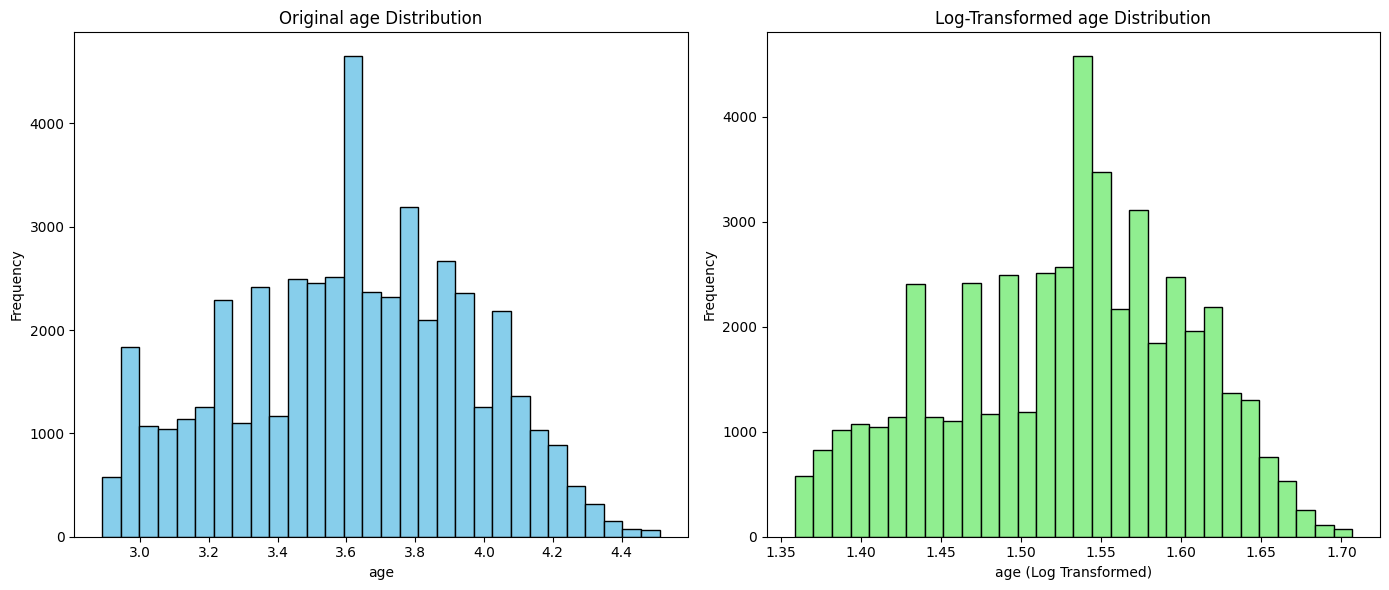

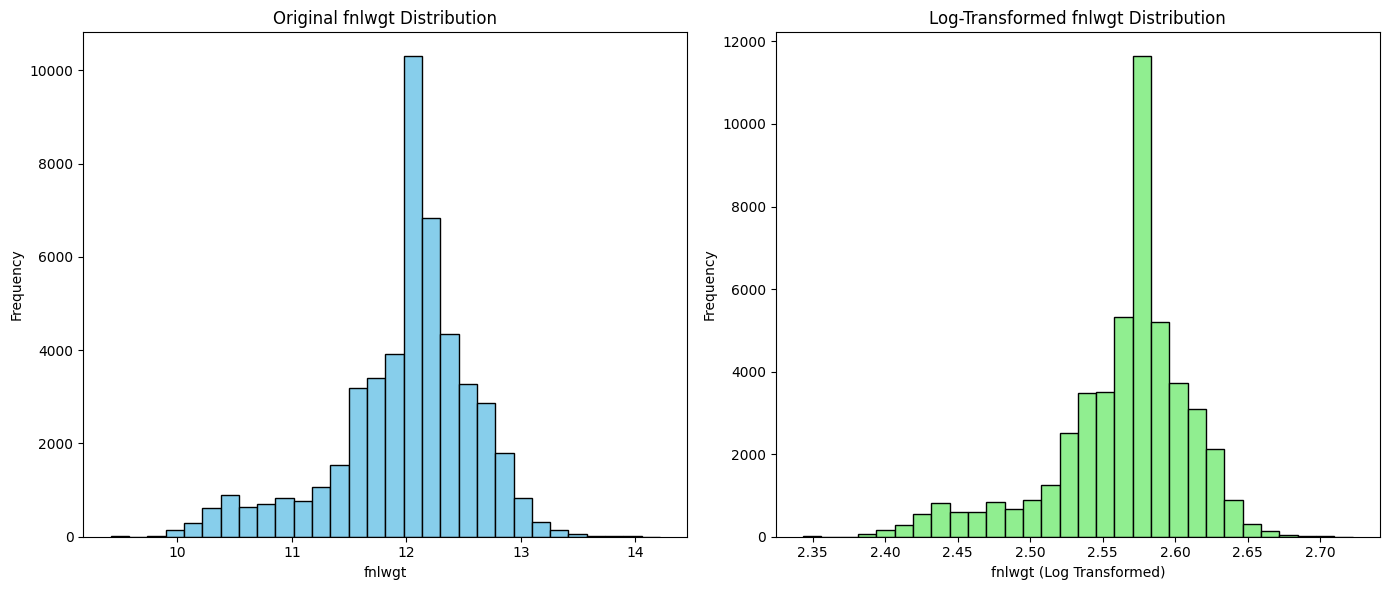

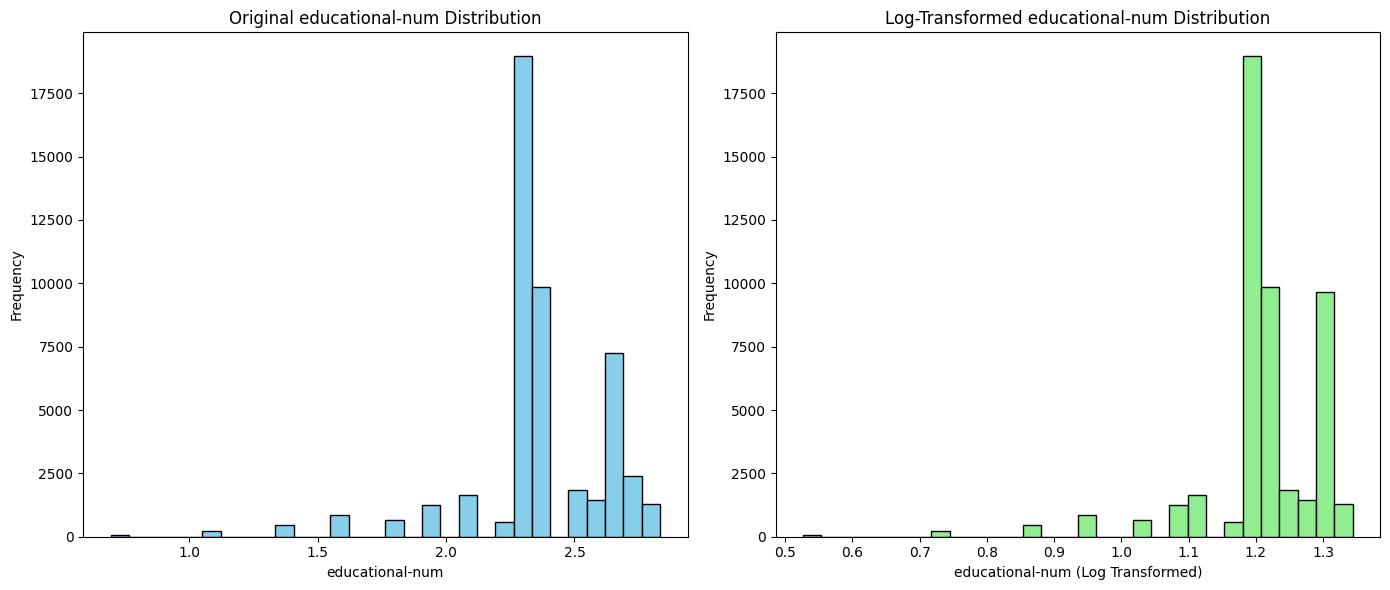

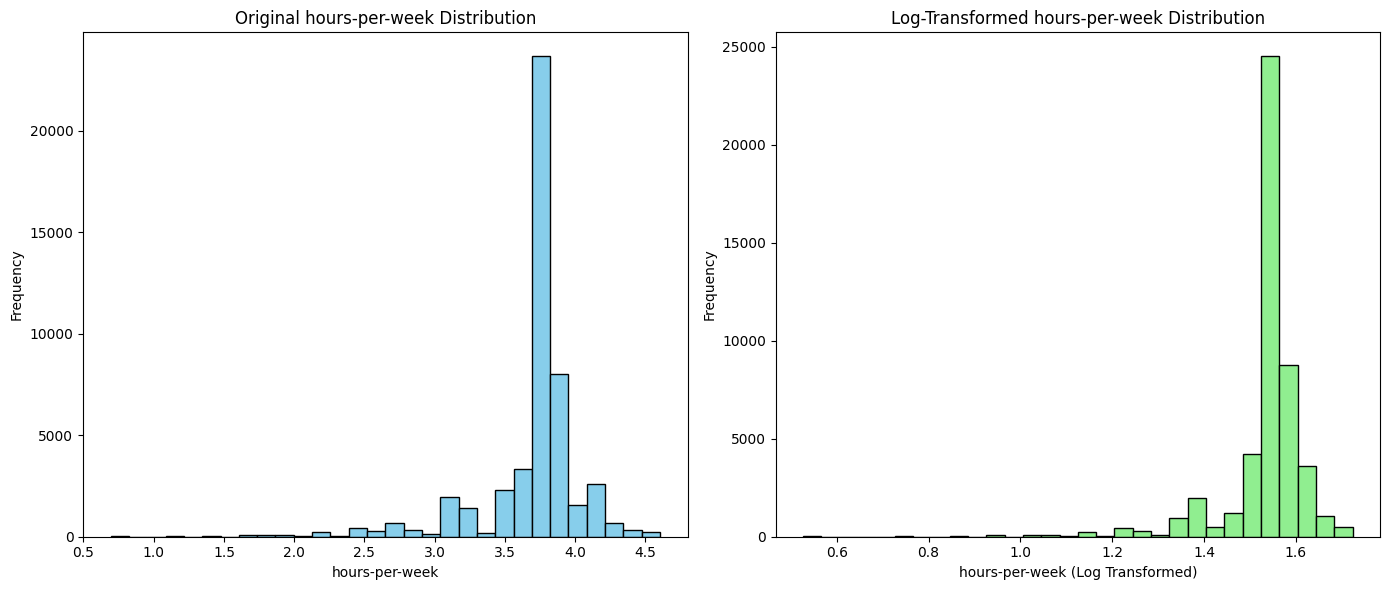

In [408]:
# Iterate through all numerical features
for feature in numerical_features:
    # Skip features that are all NaN
    if df_log_transformed[feature].dropna().shape[0] == 0:
        continue

    # Plot Original and Log-Transformed Distribution Side-by-Side
    plt.figure(figsize=(14, 6))

    # Original Distribution
    plt.subplot(1, 2, 1)
    plt.hist(df_log_transformed[feature].dropna(), bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Original {feature} Distribution')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

    # Applying Log Transformation to the features and also using log(x + 1) to handle zero values
    df_log_transformed[feature + '_log'] = np.log1p(df_log_transformed[feature])

    # Log-Transformed Distribution
    plt.subplot(1, 2, 2)
    plt.hist(df_log_transformed[feature + '_log'].dropna(), bins=30, color='lightgreen', edgecolor='black')
    plt.title(f'Log-Transformed {feature} Distribution')
    plt.xlabel(f'{feature} (Log Transformed)')
    plt.ylabel('Frequency')

    # Show Plots
    plt.tight_layout()
    plt.show()

I performed a log transformation on features such as age, capital-gain, and hours-per-week because they had a highly skewed distribution. By applying the transformation, I was able to reduce the skewness, stabilize the variance, and make the data more normally distributed, which is beneficial for building more robust and interpretable models.

Also, by visualizing the compare of the original and the loged version with bar plot, we get a better understanding of our final waight (`fnlwgt`) column, as it has long numarical values.

# **Creating the correlation and the heat-map**

In [409]:
cor_data = df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
cor_data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
age,1.000000,0.043133,0.031002,0.004507,0.001361,0.066908,-0.010846,-0.007687,-0.017836,-0.015453,0.040071,-0.001470,0.030709
workclass,0.043133,1.000000,-0.016933,0.059883,0.072642,0.026400,-0.020616,-0.018133,-0.005656,-0.076197,0.039629,-0.007217,0.141311
fnlwgt,0.031002,-0.016933,1.000000,-0.010510,-0.012064,0.027267,-0.005326,0.036207,0.042566,0.083309,0.010534,-0.002860,-0.057064
education,0.004507,0.059883,-0.010510,1.000000,0.691580,-0.010233,-0.052760,0.020757,0.006853,-0.029901,0.000423,0.065754,0.156131
educational-num,0.001361,0.072642,-0.012064,0.691580,1.000000,-0.001445,-0.058572,0.021923,0.007225,-0.029252,0.011676,0.060615,0.149500
marital-status,0.066908,0.026400,0.027267,-0.010233,-0.001445,1.000000,-0.011016,0.274886,0.019974,0.143753,-0.013350,0.016418,-0.004317
occupation,-0.010846,-0.020616,-0.005326,-0.052760,-0.058572,-0.011016,1.000000,-0.028235,-0.017380,-0.036485,0.008283,-0.025010,0.021321
relationship,-0.007687,-0.018133,0.036207,0.020757,0.021923,0.274886,-0.028235,1.000000,0.084749,0.366731,-0.026975,0.055012,-0.058456
race,-0.017836,-0.005656,0.042566,0.006853,0.007225,0.019974,-0.017380,0.084749,1.000000,0.062984,-0.035301,0.189834,-0.061709
gender,-0.015453,-0.076197,0.083309,-0.029901,-0.029252,0.143753,-0.036485,0.366731,0.062984,1.000000,0.016882,0.005859,-0.203128


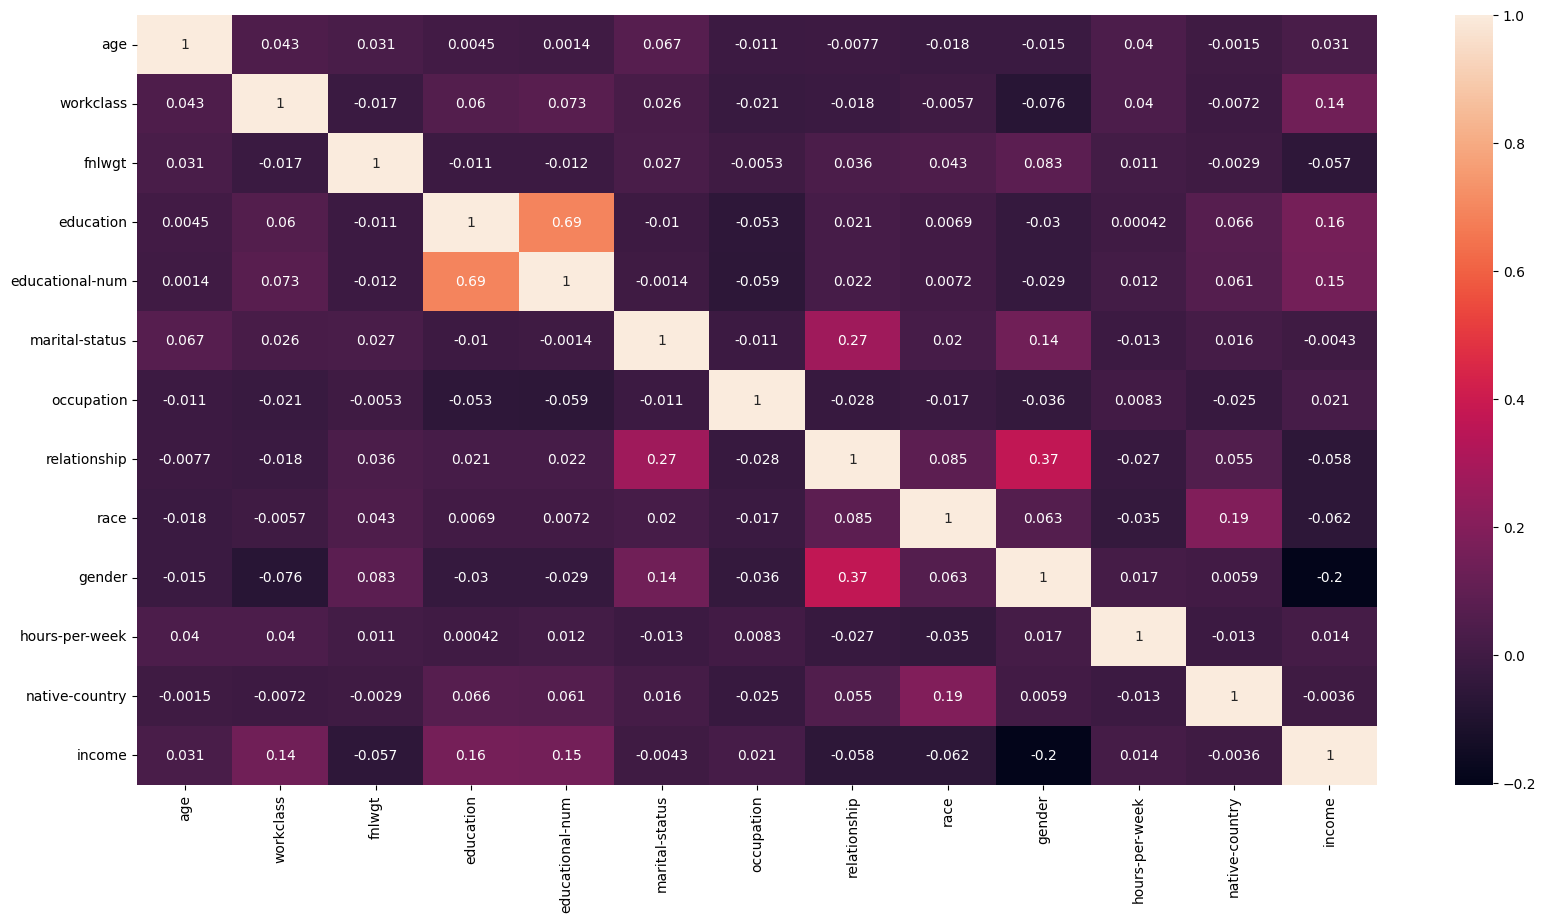

In [410]:
sns.heatmap(cor_data, annot = True)

plt.rcParams['figure.figsize'] = (20, 10)

plt.show()

### Heatmap Analysis Summary

The heatmap illustrates the correlations between various features in the dataset, particularly highlighting the relationship between educational factors and income. Key observations include:

- **Education and Income**: A positive correlation (0.16) indicates that higher education levels are associated with increased income. The educational number also shows a strong correlation (0.15) with income.
- **Gender Disparity**: A notable negative correlation (-0.2) between gender and income suggests potential income disparities, warranting further investigation into the underlying factors.
- **Work Hours**: A weak positive correlation (0.14) exists between hours worked per week and income, suggesting that individuals working more hours generally earn higher incomes.
- **Marital Status**: The correlation (0.14) with income indicates that marital status may influence earnings, as married individuals tend to have higher incomes.

This heatmap shows the analysis regarding the impacts of education and gender on income.


# Analyzing relations between the output variable (`income`) and the categorical variables

## **Grouping categorical values and also visualizing them**

In [411]:
categorical_features=[feature for feature in df.columns if data[feature].dtypes=='O' and feature != 'income']
categorical_features

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native-country']

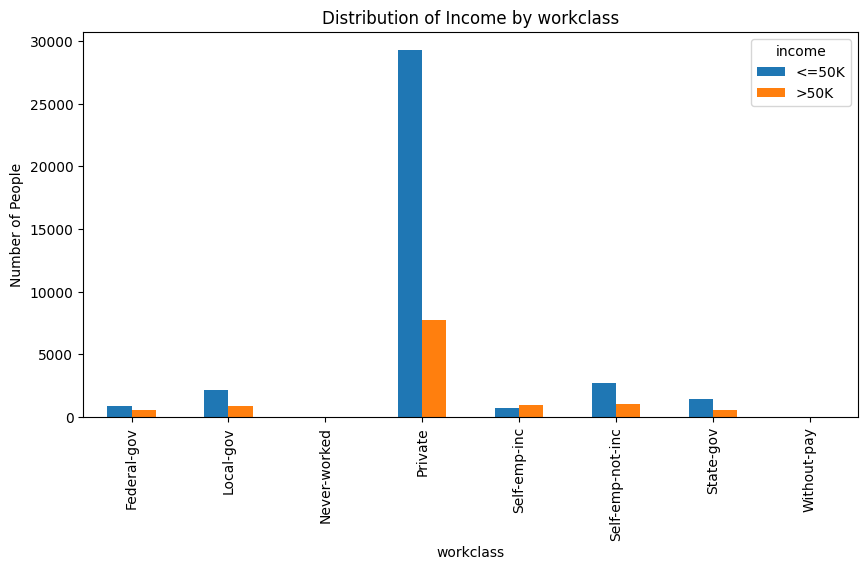

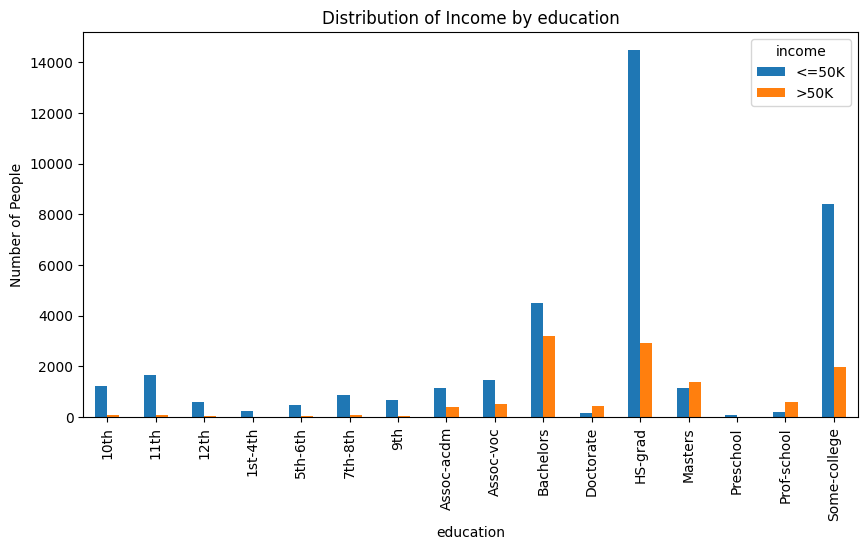

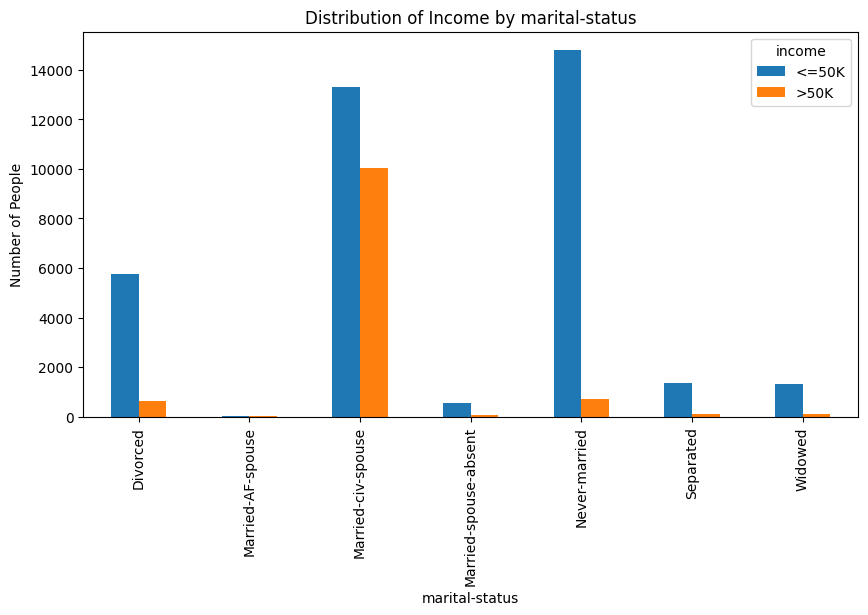

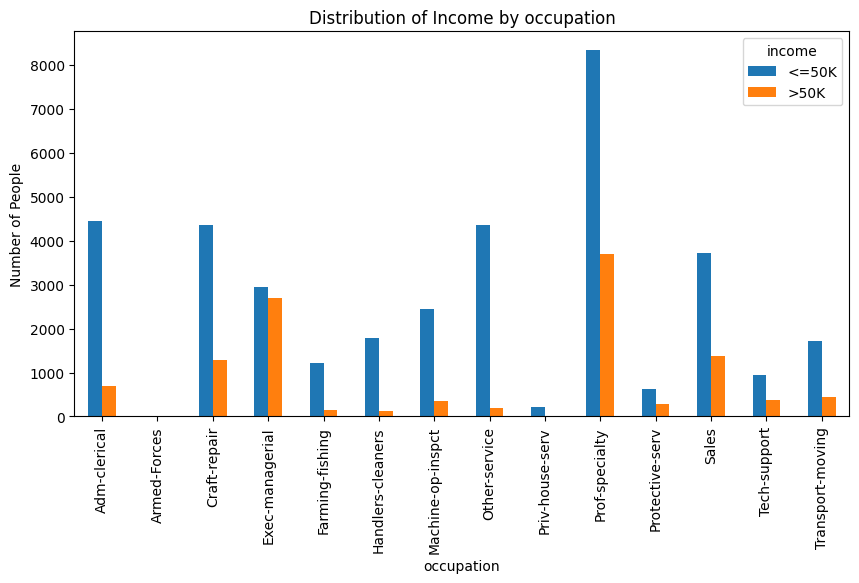

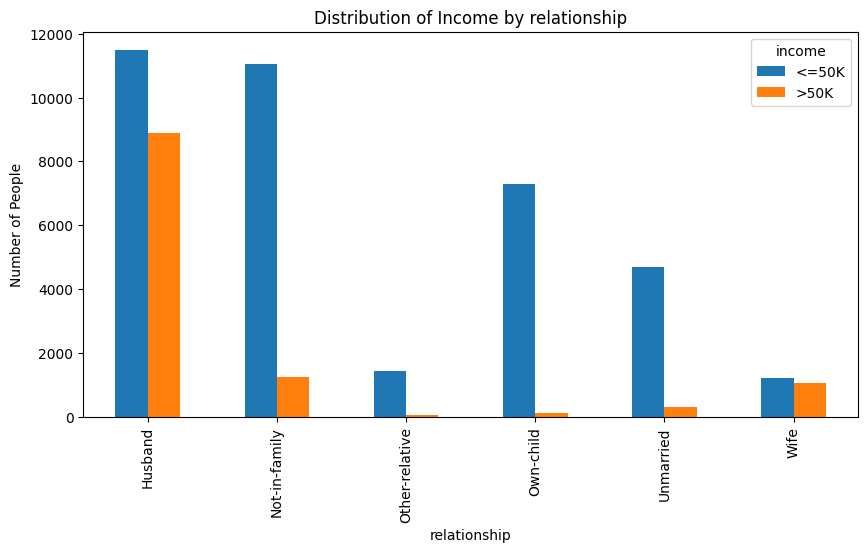

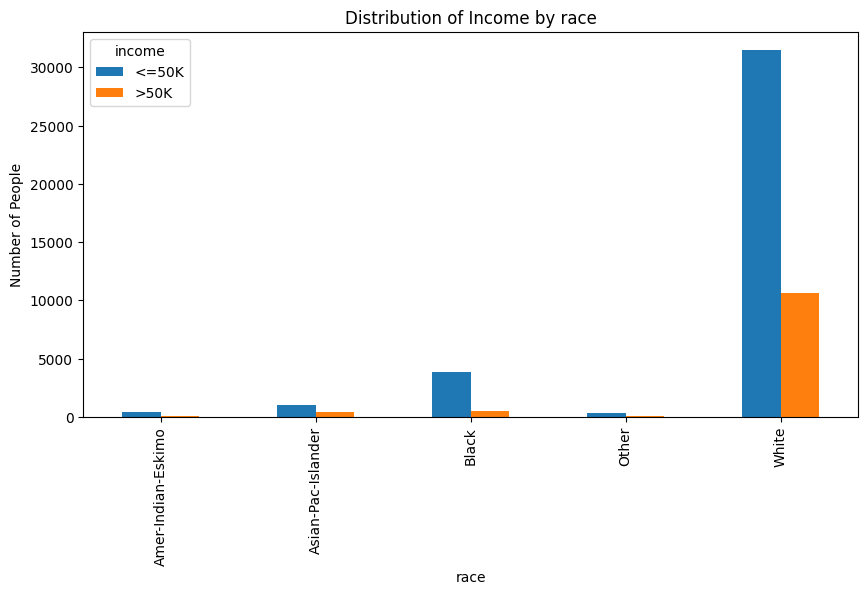

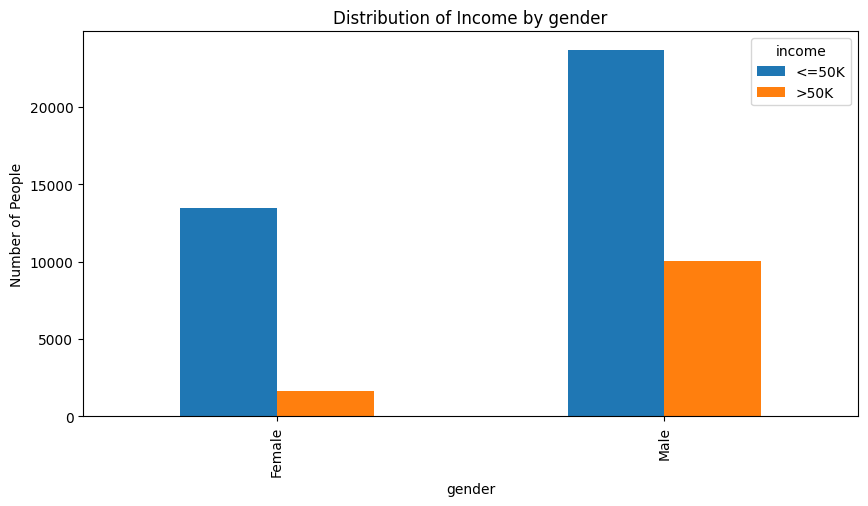

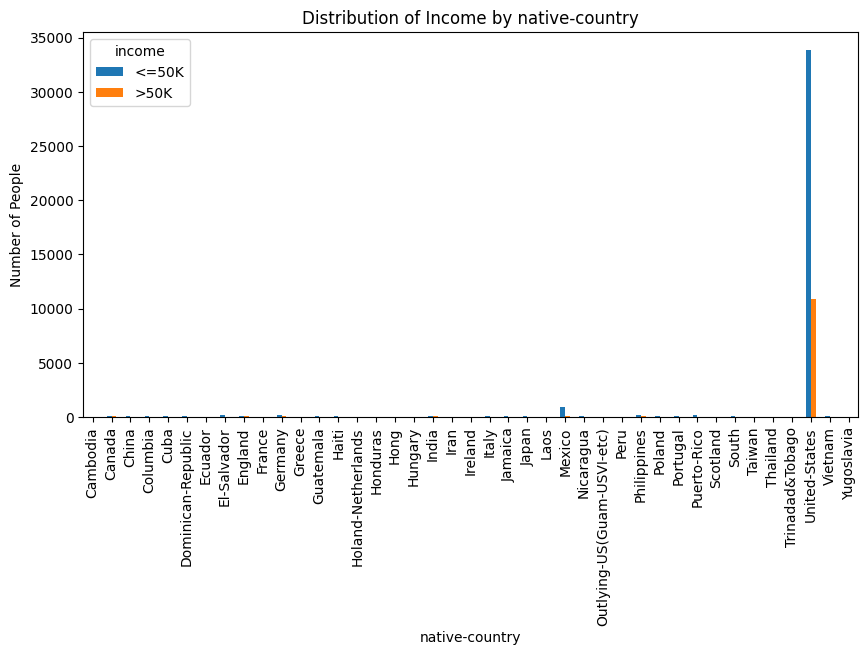

In [412]:
for feature in categorical_features:
    data = df.copy()
    
    # Group by 'feature' and 'income', and count the number of entries 
    # Convert the multi-index series into a DataFrame, where income categories ('>50K' and '<=50K') become separate columns.
    grouped_data = data.groupby([feature, 'income']).size().unstack()
    
    # Plotting the grouped bar chart
    grouped_data.plot.bar(figsize=(10, 5))
    
    # Adding labels and title
    plt.xlabel(feature)
    plt.ylabel("Number of People")
    plt.title(f"Distribution of Income by {feature}")
    plt.show()

From the above analysis we can see how, the frequency changes with different unique values of the columns.

From the `native-country` feature analysis, we can see that the data was mainly collected from the united-states.

**Future Recommendations**: I recommend focusing on educational initiatives and gender equality measures to address income disparities. Further analysis of categorical features, such as occupation and work class, could also provide deeper insights.

Overall, this EDA process has equipped me with valuable insights into income determinants, laying the groundwork for more advanced modeling in future analyses. 

--- 